<a href="https://colab.research.google.com/github/SoMuchSerenity/Deep-Learning/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
from tensorflow import keras

In [2]:
url = 'https://raw.githubusercontent.com/SoMuchSerenity/Deep-Learning/main/train.csv'
train = pd.read_csv(url)




1.   List item
2.   List item





## Step 1 EDA and build plain model

In [97]:
train.head(10)

,id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0,16,0,3,2,2,1,5,4,2,...,0,1,0,1,1,0,0,1,1,0
1,1,17,4,0,1,4,0,4,2,4,...,0,1,0,1,0,1,0,1,0,1
2,2,17,1,0,1,2,0,4,4,2,...,0,1,1,0,1,0,0,1,0,1
3,3,17,2,2,3,1,0,2,4,2,...,1,0,0,1,0,1,0,1,1,0
4,4,14,0,1,1,0,0,3,3,2,...,0,1,0,1,0,1,0,1,1,0
5,5,16,1,1,1,0,0,1,3,1,...,0,1,0,1,1,0,0,1,1,0
6,6,16,4,1,1,2,0,2,4,1,...,1,0,0,1,0,1,1,0,1,0
7,7,14,2,3,1,2,0,5,2,4,...,0,1,0,1,0,1,0,1,1,0
8,8,14,3,1,1,1,0,4,2,2,...,0,1,0,1,0,1,0,1,0,1
9,9,14,3,0,1,3,0,4,0,0,...,1,0,0,1,1,0,0,1,0,1


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20064 entries, 0 to 20063
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20064 non-null  int64 
 1   school      20064 non-null  object
 2   sex         20064 non-null  object
 3   age         20064 non-null  int64 
 4   address     20064 non-null  object
 5   famsize     20064 non-null  object
 6   Pstatus     20064 non-null  object
 7   Medu        20064 non-null  int64 
 8   Fedu        20064 non-null  int64 
 9   Mjob        20064 non-null  object
 10  Fjob        20064 non-null  object
 11  reason      20064 non-null  object
 12  guardian    20064 non-null  object
 13  traveltime  20064 non-null  int64 
 14  studytime   20064 non-null  int64 
 15  failures    20064 non-null  int64 
 16  schoolsup   20064 non-null  object
 17  famsup      20064 non-null  object
 18  paid        20064 non-null  object
 19  activities  20064 non-null  object
 20  nurser

In [80]:
train = pd.get_dummies(train)
train_target = train['Grade']
train = train.drop(['Grade'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
train_target.unique()

array([ 7, 12,  8,  9, 10, 11, 13, 14,  6, 18,  5, 16, 17])

In [82]:
d = {}
for i in range(len(np.sort(train_target.unique()))):
    d[np.sort(train_target.unique())[i]] = i

d

{5: 0,
 6: 1,
 7: 2,
 8: 3,
 9: 4,
 10: 5,
 11: 6,
 12: 7,
 13: 8,
 14: 9,
 16: 10,
 17: 11,
 18: 12}

In [86]:
train_target = train_target.replace(d)

In [87]:
train_target[:20]

0     2
1     7
2     3
3     4
4     3
5     3
6     4
7     4
8     4
9     5
10    5
11    4
12    2
13    4
14    5
15    5
16    4
17    4
18    3
19    4
Name: Grade, dtype: int64

In [88]:
train_target.unique()

array([ 2,  7,  3,  4,  5,  6,  8,  9,  1, 12,  0, 10, 11])

In [89]:
x_train = train[:18000]
y_train = train_target[:18000]
x_valid = train[18000:]
y_valid = train_target[18000:]

In [90]:
model = keras.models.Sequential([
    keras.layers.Dense(40, activation="sigmoid",input_shape = (59,)),
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(13,activation='softmax')
])

In [91]:
model.layers

In [92]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 40)                2400      
                                                                 
 dense_16 (Dense)            (None, 30)                1230      
                                                                 
 dense_17 (Dense)            (None, 13)                403       
                                                                 
Total params: 4,033
Trainable params: 4,033
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [94]:
history = model.fit(x_train, y_train, epochs=100,batch_size = 10,
                    validation_data=(x_valid, y_valid))

Epoch 1/100
1800/1800 [==============================] - 4s 2ms/step - loss: 1.4478 - accuracy: 0.5236 - val_loss: 1.4436 - val_accuracy: 0.5276
Epoch 2/100
1800/1800 [==============================] - 3s 2ms/step - loss: 1.4234 - accuracy: 0.5264 - val_loss: 1.4431 - val_accuracy: 0.5276
Epoch 3/100
1800/1800 [==============================] - 3s 2ms/step - loss: 1.4214 - accuracy: 0.5264 - val_loss: 1.4394 - val_accuracy: 0.5276
Epoch 4/100
1800/1800 [==============================] - 3s 2ms/step - loss: 1.4198 - accuracy: 0.5264 - val_loss: 1.4393 - val_accuracy: 0.5276
Epoch 5/100
1800/1800 [==============================] - 3s 2ms/step - loss: 1.4204 - accuracy: 0.5264 - val_loss: 1.4446 - val_accuracy: 0.5276
Epoch 6/100
1800/1800 [==============================] - 3s 2ms/step - loss: 1.4194 - accuracy: 0.5264 - val_loss: 1.4429 - val_accuracy: 0.5276
Epoch 7/100
1800/1800 [==============================] - 3s 2ms/step - loss: 1.4182 - accuracy: 0.5264 - val_loss: 1.4455 - val_ac

In [96]:
model.save("plain_model_version1.h5")

In [149]:
import matplotlib.pyplot as plt


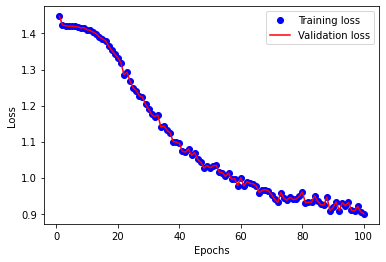

In [156]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,loss,'r-',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

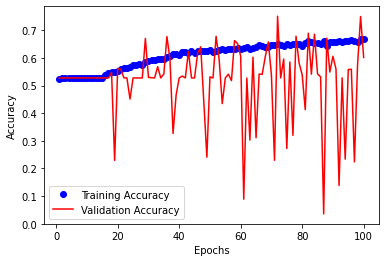

In [159]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'r-',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [160]:
model_embed = keras.models.Sequential([
    keras.layers.Embedding(input_dim = 59 ,output_dim = 30,input_length=1),                        
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(13,activation='softmax')
])

In [161]:
model_embed.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 1, 30)             1770      
                                                                 
 dense_36 (Dense)            (None, 1, 30)             930       
                                                                 
 dense_37 (Dense)            (None, 1, 30)             930       
                                                                 
 dense_38 (Dense)            (None, 1, 13)             403       
                                                                 
Total params: 4,033
Trainable params: 4,033
Non-trainable params: 0
_________________________________________________________________


In [162]:
model_embed.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [163]:
y_valid

18000    6
18001    6
18002    3
18003    4
18004    3
        ..
20059    4
20060    3
20061    3
20062    3
20063    4
Name: Grade, Length: 2064, dtype: int64

In [164]:
history_embed = model_embed.fit(x_train, y_train, epochs=100,batch_size = 10,
                                validation_data=(x_valid, y_valid))

Epoch 1/100


ValueError: ignored

## Step 2: Improve Data Quality


In [3]:
url = 'https://raw.githubusercontent.com/SoMuchSerenity/Deep-Learning/main/train.csv'
data = pd.read_csv(url)

In [4]:
y = data.select_dtypes(include=['int64'])
y

,id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,0,16,0,3,2,2,1,5,4,2,1,0,4,2,8,13,7
1,1,17,4,0,1,4,0,4,2,4,2,2,1,28,12,10,12
2,2,17,1,0,1,2,0,4,4,2,1,2,2,3,11,9,8
3,3,17,2,2,3,1,0,2,4,2,2,2,4,2,16,15,9
4,4,14,0,1,1,0,0,3,3,2,2,1,4,0,9,14,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20059,20059,15,3,1,1,1,0,4,3,4,6,2,4,3,20,18,9
20060,20060,17,2,1,1,1,0,4,3,1,1,2,4,2,17,16,8
20061,20061,17,0,1,4,1,0,3,1,1,0,1,4,1,11,14,8
20062,20062,17,3,1,1,2,0,2,2,2,0,1,2,5,11,15,8


In [5]:
y = y.drop(['id'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [6]:
y.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
count,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000
mean,15.649970,2.532197,1.551585,1.705891,1.541368,0.134619,3.939593,2.850778,2.174043,1.812450,1.956788,2.832137,2.009270,13.905702,12.252043,9.024771
std,1.204188,1.128737,1.036555,1.117113,0.993014,0.460545,0.871920,1.143260,1.256756,1.483721,1.392719,1.437471,3.505567,3.265775,3.474807,1.311570
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,15.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12.000000,10.000000,8.000000
50%,16.000000,3.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.000000,14.000000,12.000000,9.000000
75%,16.000000,3.000000,2.000000,2.000000,2.000000,0.000000,5.000000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,16.000000,15.000000,9.000000
max,21.000000,4.000000,4.000000,6.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,6.000000,5.000000,39.000000,22.000000,22.000000,18.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Correlation Analysis')

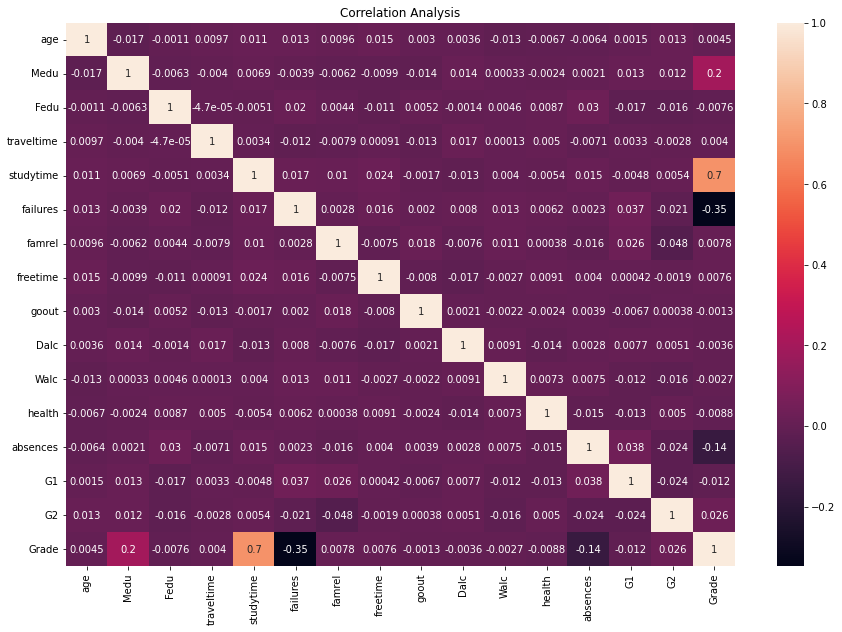

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(y.corr(), annot=True)
plt.title('Correlation Analysis')


In [104]:
correlation_matrix = y.corr()
correlation_matrix["Grade"].sort_values(ascending=False)


Grade         1.000000
studytime     0.699380
Medu          0.196841
G2            0.026015
famrel        0.007759
freetime      0.007551
age           0.004543
traveltime    0.003952
goout        -0.001315
Walc         -0.002661
Dalc         -0.003632
Fedu         -0.007594
health       -0.008792
G1           -0.011661
absences     -0.143699
failures     -0.348047
Name: Grade, dtype: float64

In [9]:
x  = data.select_dtypes(include=['object'])
x

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,teacher,services,home,mother,no,yes,no,yes,yes,no,yes,no
1,MS,M,U,GT3,T,other,services,home,other,no,yes,no,yes,yes,yes,yes,yes
2,MS,F,U,LE3,T,services,at_home,course,mother,yes,no,no,yes,no,no,yes,yes
3,GP,M,R,LE3,T,health,other,reputation,father,no,yes,no,no,yes,yes,yes,no
4,MS,F,R,LE3,T,health,teacher,reputation,mother,yes,yes,yes,yes,yes,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20059,GP,F,U,GT3,T,services,teacher,reputation,mother,no,yes,no,no,yes,yes,yes,no
20060,GP,M,U,LE3,T,teacher,teacher,other,mother,yes,yes,no,yes,yes,no,yes,yes
20061,GP,F,U,GT3,T,other,other,other,father,no,yes,no,no,yes,yes,no,no
20062,MS,M,U,GT3,T,services,other,reputation,other,no,no,no,no,yes,no,yes,no
